In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
def csv_to_numpy(csv_file):
    df = pd.read_csv(csv_file, skiprows=5, header=None, usecols=range(2, 326))
    data = df.to_numpy()
    data = data.reshape(-1, 108, 3)
    print(data.shape)
    return data

In [5]:
spc0 = csv_to_numpy('20230412_CH_MTest.csv')

(561, 108, 3)


In [4]:
import numpy as np
from scipy.spatial.transform import Rotation as R

def compute_centroid(point_cloud):
    return np.mean(point_cloud, axis=0)

def compute_rotation_and_translation(pc1, pc2):
    # Compute centroids
    centroid_pc1 = compute_centroid(pc1)
    centroid_pc2 = compute_centroid(pc2)
    
    # Center the point clouds
    pc1_centered = pc1 - centroid_pc1
    pc2_centered = pc2 - centroid_pc2
    
    # Compute the covariance matrix
    H = np.dot(pc1_centered.T, pc2_centered)
    
    # Compute the Singular Value Decomposition (SVD)
    U, S, Vt = np.linalg.svd(H)
    
    # Compute the rotation matrix
    R = np.dot(Vt.T, U.T)
    
    # Compute the translation vector
    t = -np.dot(R, centroid_pc1.T) + centroid_pc2.T
    
    return R, t

def apply_transformation(pc, R, t):
    # Apply rotation
    pc_rotated = np.dot(R, pc.T).T
    
    # Apply translation
    pc_transformed = pc_rotated + t
    
    return pc_transformed

In [9]:
def compute_rotation_and_translation(pc1, pc2):
    # Compute centroids
    centroid_pc1 = compute_centroid(pc1)
    centroid_pc2 = compute_centroid(pc2)

    # Center the point clouds
    pc1_centered = pc1 - centroid_pc1
    pc2_centered = pc2 - centroid_pc2

    # Compute the covariance matrix
    H = np.dot(pc1_centered.T, pc2_centered)

    # Compute the Singular Value Decomposition (SVD)
    U, S, Vt = np.linalg.svd(H)

    # Compute the rotation matrix
    R = np.dot(Vt.T, U.T)

    # Ensure it's a proper rotation, correct if necessary
    if np.linalg.det(R) < 0:
        Vt[-1,:] *= -1
        R = np.dot(Vt.T, U.T)

    # Compute the translation vector
    t = -np.dot(R, centroid_pc1.T) + centroid_pc2.T

    return R, t


In [10]:
spc1_list = []
pc0 = spc0[0, :3, :]
#vp0 = np.array([1, 1, 1])
#pc0 = np.vstack([pc0, vp0])
for pc in spc0:
    pci = pc[:3, :]
    #vpi = np.array([1, 1, 1])
    #pci = np.vstack([pci, vpi])
    R, t = compute_rotation_and_translation(pci, pc0)
    pt = apply_transformation(pc, R, t)
    spc1_list.append(pt)
spc1 = np.array(spc1_list)
print(spc1.shape)

(561, 108, 3)


MovieWriter ffmpeg unavailable; using Pillow instead.


Note: you may need to restart the kernel to use updated packages.


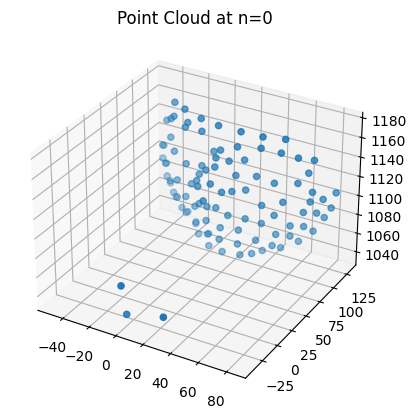

In [11]:
%pip install JSAnimation

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from IPython.display import HTML

# Create a random 3D numpy array for demonstration
# array shape: (n=561, number_of_points=105, number_of_dimensions=3)
arr = spc1

# Create a figure and 3D subplot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Create a scatter plot for the first point cloud
scatter = ax.scatter(arr[0,:,0], arr[0,:,1], arr[0,:,2])

# Function to update the scatter plot for each frame
def update(frame):
    scatter._offsets3d = (arr[frame,:,0], arr[frame,:,1], arr[frame,:,2])
    ax.set_title(f'Point Cloud at n={frame}')

# Create an animation
ani = animation.FuncAnimation(fig, update, frames=range(561), interval=50)

# Convert the animation to HTML
#html = ani.to_jshtml()

ani.save('spc-7.gif')

# Display the animation
#HTML(html)